In [14]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [47]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open('/home/marc/Desktop/Scene-Graph-Benchmark.pytorch-master/Scene-Graph-Benchmark.pytorch/test_img_2/output/custom_prediction.json'))
custom_data_info = json.load(open('/home/marc/Desktop/Scene-Graph-Benchmark.pytorch-master/Scene-Graph-Benchmark.pytorch/test_img_2/output/custom_data_info.json'))

In [48]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [64]:
# parameters
image_idx = 0
box_topk = 20 # select top k bounding boxes
rel_topk = 20 # select top k relationships
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']

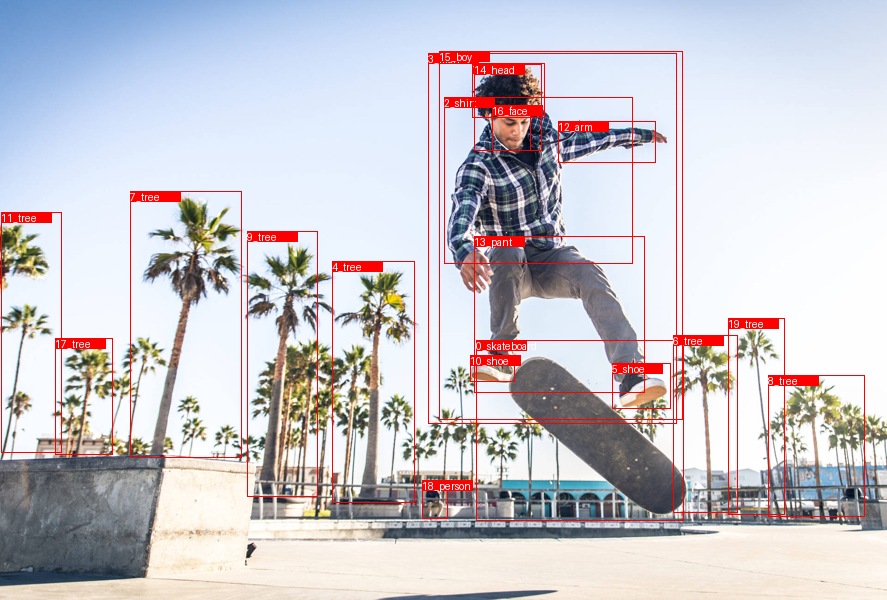

**************************************************
box_labels 0: skateboard; score: 0.7822861075401306
box_labels 1: hair; score: 0.6894652843475342
box_labels 2: shirt; score: 0.570119321346283
box_labels 3: man; score: 0.5401892066001892
box_labels 4: tree; score: 0.4474335014820099
box_labels 5: shoe; score: 0.38222262263298035
box_labels 6: tree; score: 0.37784168124198914
box_labels 7: tree; score: 0.329750657081604
box_labels 8: tree; score: 0.3055710196495056
box_labels 9: tree; score: 0.29160845279693604
box_labels 10: shoe; score: 0.2793210744857788
box_labels 11: tree; score: 0.2550528943538666
box_labels 12: arm; score: 0.24968527257442474
box_labels 13: pant; score: 0.21186068654060364
box_labels 14: head; score: 0.18642069399356842
box_labels 15: boy; score: 0.17658589780330658
box_labels 16: face; score: 0.1751902997493744
box_labels 17: tree; score: 0.15595677495002747
box_labels 18: person; score: 0.1470036506652832
box_labels 19: tree; score: 0.14643257856369019
******

In [65]:
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]
draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

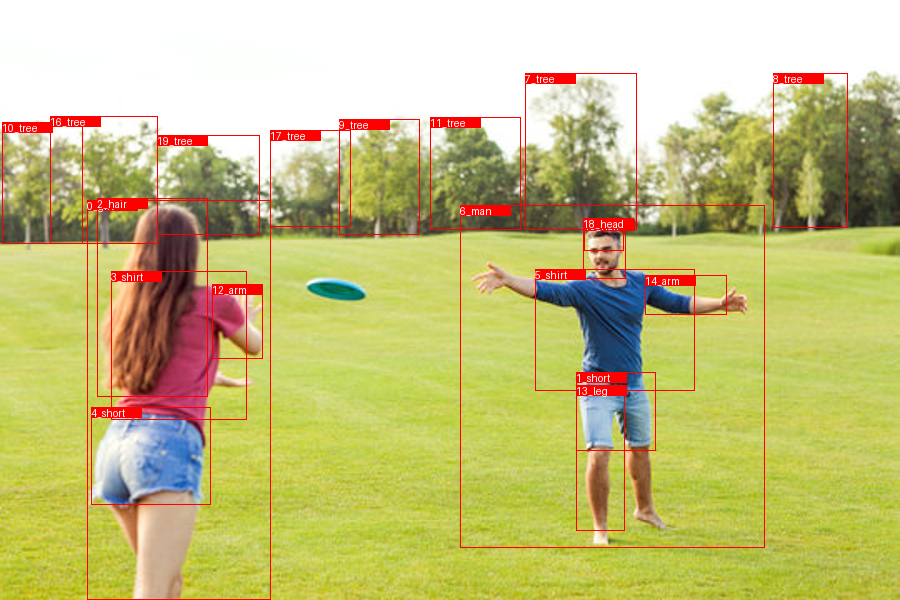

**************************************************
box_labels 0: girl; score: 0.9411415457725525
box_labels 1: short; score: 0.8603424429893494
box_labels 2: hair; score: 0.8092005848884583
box_labels 3: shirt; score: 0.7437920570373535
box_labels 4: short; score: 0.7349212765693665
box_labels 5: shirt; score: 0.6538022756576538
box_labels 6: man; score: 0.5898907780647278
box_labels 7: tree; score: 0.4298230707645416
box_labels 8: tree; score: 0.36006447672843933
box_labels 9: tree; score: 0.33026739954948425
box_labels 10: tree; score: 0.2818030118942261
box_labels 11: tree; score: 0.2498079389333725
box_labels 12: arm; score: 0.21852682530879974
box_labels 13: leg; score: 0.20921210944652557
box_labels 14: arm; score: 0.20771601796150208
box_labels 15: hair; score: 0.19575518369674683
box_labels 16: tree; score: 0.19394837319850922
box_labels 17: tree; score: 0.1807338148355484
box_labels 18: head; score: 0.17686320841312408
box_labels 19: tree; score: 0.16095592081546783
**********

In [66]:
image_path = custom_data_info['idx_to_files'][1]
boxes = custom_prediction[str(1)]['bbox'][:box_topk]
box_labels = custom_prediction[str(1)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(1)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(1)]['rel_labels']
all_rel_scores = custom_prediction[str(1)]['rel_scores']
all_rel_pairs = custom_prediction[str(1)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]
draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

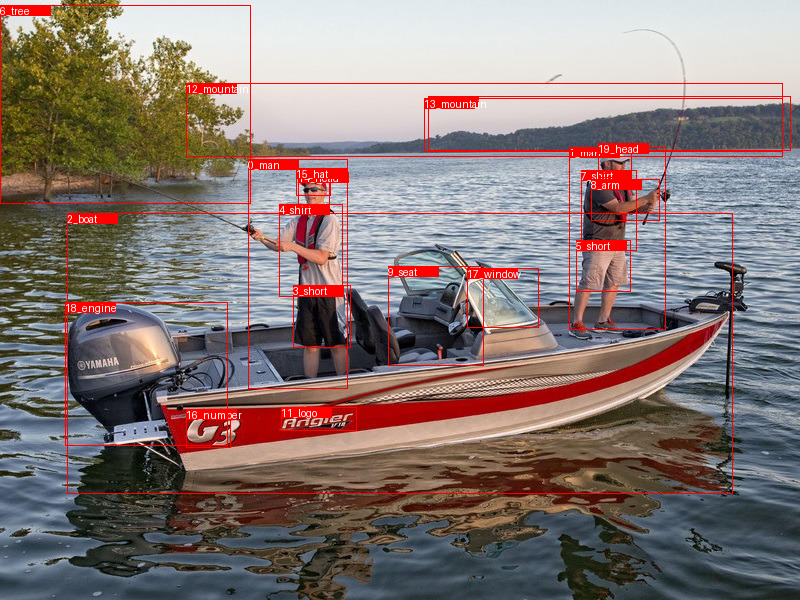

**************************************************
box_labels 0: man; score: 0.7382491230964661
box_labels 1: man; score: 0.6986112594604492
box_labels 2: boat; score: 0.6851323843002319
box_labels 3: short; score: 0.6786119937896729
box_labels 4: shirt; score: 0.5267311930656433
box_labels 5: short; score: 0.519808292388916
box_labels 6: tree; score: 0.4365440011024475
box_labels 7: shirt; score: 0.2501067519187927
box_labels 8: arm; score: 0.1986982375383377
box_labels 9: seat; score: 0.19690115749835968
box_labels 10: hill; score: 0.19315959513187408
box_labels 11: logo; score: 0.1596256047487259
box_labels 12: mountain; score: 0.14367616176605225
box_labels 13: mountain; score: 0.1393386572599411
box_labels 14: head; score: 0.1295950710773468
box_labels 15: hat; score: 0.11403006315231323
box_labels 16: number; score: 0.09538748115301132
box_labels 17: window; score: 0.08878576755523682
box_labels 18: engine; score: 0.08555348217487335
box_labels 19: head; score: 0.0731055140495300

In [67]:
image_path = custom_data_info['idx_to_files'][2]
boxes = custom_prediction[str(2)]['bbox'][:box_topk]
box_labels = custom_prediction[str(2)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(2)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(2)]['rel_labels']
all_rel_scores = custom_prediction[str(2)]['rel_scores']
all_rel_pairs = custom_prediction[str(2)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]
draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)